# Regressão Linear

A analise de regressão linear avalia a relação estatística entre uma ou mais variáveis.
Para treinar o modelo adequadamente, seria necssário o conjunto entre treino e teste, mas por enquanto não o foco desse notebook

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import datetime
from pegar_historico import pegar_historico

In [97]:
#Definindo o estilo dos de cor dos gráficos

# Plot (estilo escuro, Instagram-friendly)
plt.style.use('dark_background')

In [37]:
par = "BTCBRL"
intervalo = "1d"
data_inicio = "1 Jan 2025"

df_btcbrl = pegar_historico(
        par,
        intervalo,
        data_inicio
    )

df_btcbrl['day'] = (df_btcbrl['timestamp'] - df_btcbrl['timestamp'].min()).dt.days

df_btcbrl.head(5)

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,day
0,2025-01-01,583135.0,591233.0,579057.0,588693.0,72.14957,1735775999999,42310167.57540000,21358,41.00811000,24046544.55393000,0,0
1,2025-01-02,588635.0,607111.0,587263.0,599306.0,166.56756,1735862399999,99793602.55375000,47531,78.05491000,46770433.42530000,0,1
2,2025-01-03,599363.0,613793.0,594140.0,607582.0,128.54397,1735948799999,77592339.31612000,39792,61.49631000,37100120.06508000,0,2
3,2025-01-04,607593.0,612902.0,604369.0,609413.0,64.64526,1736035199999,39296764.14958000,27377,31.38893000,19078907.64598000,0,3
4,2025-01-05,609412.0,613000.0,604300.0,611273.0,58.20556,1736121599999,35453798.90673000,22973,27.81086000,16944045.55734000,0,4


In [39]:
#Como não pretendo usar todas as colunas para estudo, irei filtrar todas apenas as colunas necessárias

df_btcbrl = df_btcbrl[[
    'timestamp','open','high','low','close','volume','day'
]]

df_btcbrl.head(5)

### Volume é Uma medida de quanto de uma criptomoeda foi negociada nas últimas 24 horas.

,timestamp,open,high,low,close,volume,day
0,2025-01-01,583135.0,591233.0,579057.0,588693.0,72.14957,0
1,2025-01-02,588635.0,607111.0,587263.0,599306.0,166.56756,1
2,2025-01-03,599363.0,613793.0,594140.0,607582.0,128.54397,2
3,2025-01-04,607593.0,612902.0,604369.0,609413.0,64.64526,3
4,2025-01-05,609412.0,613000.0,604300.0,611273.0,58.20556,4


## Analisando o tipo de distribuição dos preços do Bitcoin

C:\Users\FilipeQueirozdeAbreu\AppData\Local\Temp\ipykernel_15628\3078069071.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='close', ylabel='Density'>

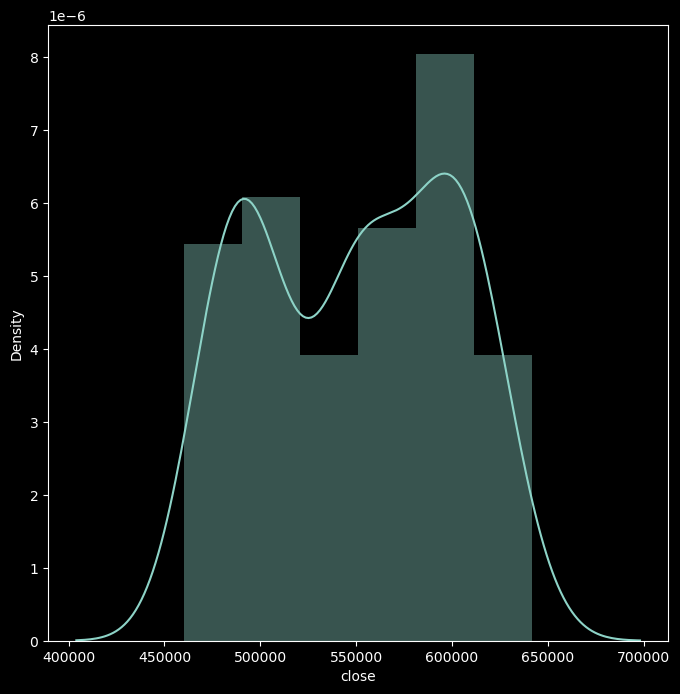

In [115]:
plt.figure(
    figsize=(8,8)
)
sns.distplot(y)

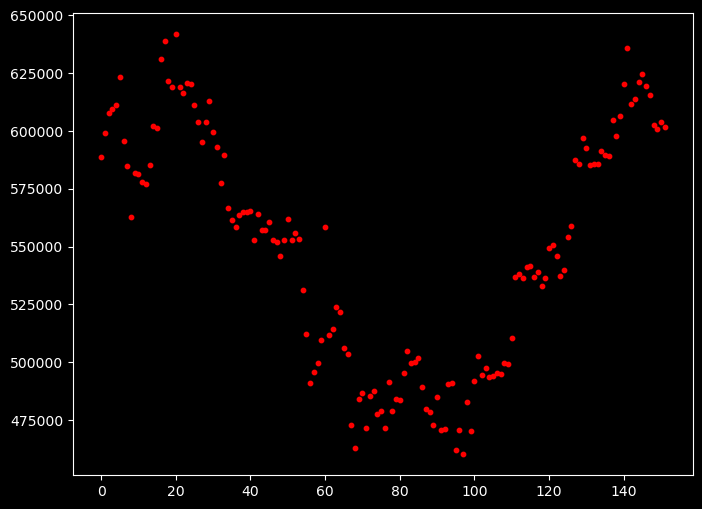

In [89]:
X = df_btcbrl[['day']]
y = df_btcbrl['close']

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='red', s=10, label='Dados Reais') 

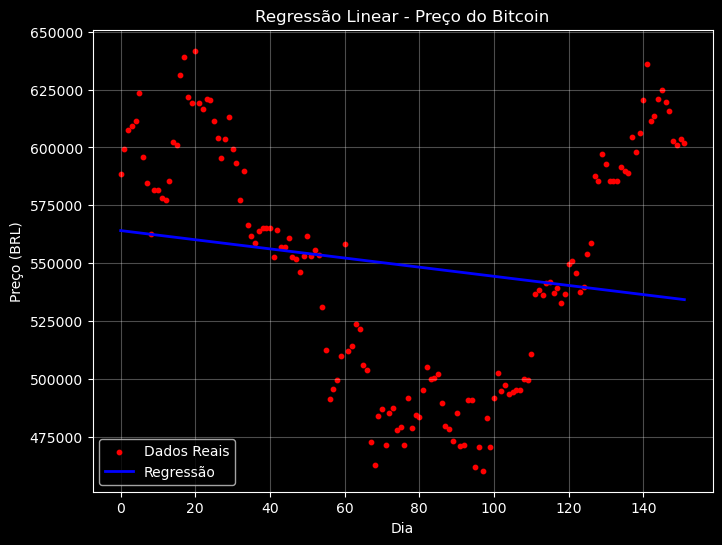

In [119]:
# Treinando modelo linear
model = LinearRegression()
model.fit(X, y)

# Predições
y_pred = model.predict(X)

# Gráfico de dispersão + linha de regressão
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='red', s=10, label='Dados Reais')         # pontos
plt.plot(X, y_pred, color='blue', linewidth=2, label='Regressão') # linha
plt.xlabel("Dia")
plt.ylabel("Preço (BRL)")
plt.title("Regressão Linear - Preço do Bitcoin")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Feature engineering

In [75]:
#Média móvel
df_btcbrl['ma7'] = df_btcbrl['close'].rolling(window=7).mean()

#removendo os valores NaN
df_btcbrl['ma7'] = df_btcbrl['ma7'].fillna(df_btcbrl['ma7'].mean()) 

## Aplicando o algorítmo de regressão Linear

In [77]:
# Regressão linear
X = df_btcbrl[['volume','ma7']]
y = df_btcbrl['close']
model = LinearRegression()

model.fit(X, y)
df_btcbrl['predicted'] = model.predict(X)

In [79]:
df_btcbrl[
    ['close', 'predicted']
]

,close,predicted
0,588693.0,549965.546107
1,599306.0,548957.769356
2,607582.0,549363.616695
3,609413.0,550045.643863
4,611273.0,550114.378433
...,...,...
147,615599.0,621012.904679
148,602776.0,615999.674202
149,600881.0,614644.021090
150,603709.0,614344.046892


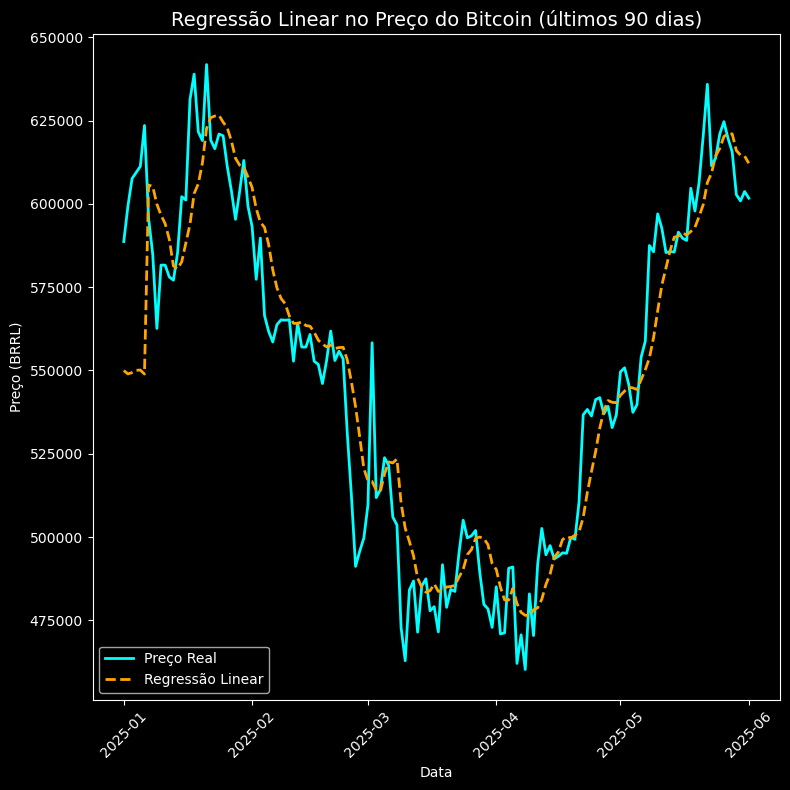

In [113]:
fig, ax = plt.subplots(figsize=(8, 8))  # Formato 1:1 para Instagram

ax.plot(df_btcbrl['timestamp'], df_btcbrl['close'], label='Preço Real', color='cyan', linewidth=2)
ax.plot(df_btcbrl['timestamp'], df_btcbrl['predicted'], label='Regressão Linear', color='orange', linestyle='--', linewidth=2)
ax.set_title('Regressão Linear no Preço do Bitcoin (últimos 90 dias)', fontsize=14)
ax.set_xlabel('Data')
ax.set_ylabel('Preço (BRRL)')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
# Salvar imagem para post
image_path = "/mnt/data/regressao_linear_bitcoin.png"
plt.savefig(image_path)
plt.close()